In [1]:
import sys
sys.path.append("../")

from rbm import fasta_read, get_checkpoint, get_beta_and_W, all_weights, RBM
import analysis_methods as am

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import subprocess as sp
import matplotlib.image as mpimg

/home/jonah/anaconda3/envs/utils/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [4]:
# Directory of Stored RBMs
mdir = "/mnt/D1/globus/pig_trained_rbms/"
rounds = ["b3", "n1", "np1", "np2", "np3"]
c1_rounds = [x + "_c1" for x in rounds]
c2_rounds = [x + "_c2" for x in rounds]

#### Generate Weights

In [5]:
# generate weights in respective
for rid, round in enumerate(c2_rounds):
    # if rid > 0:
    #     break
    checkp, version_dir = am.get_checkpoint_path(round, rbmdir=mdir)
    tmp = RBM.load_from_checkpoint(checkp)
    all_weights(tmp, version_dir +round+"_weights", 5, 1, 6, 2, "protein")

../rbm_utils.py:297: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xticks, xtickslabels)


<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

In [7]:
# Stores all data in a dictionary ("data")
data_c2 = am.fetch_data(c2_rounds, dir="../../pig_tissue", counts=True)

In [8]:
# Generate Sequence Logo for Each round
paths_u, paths_w = [], []
for r in c2_rounds:
    paths_u.append(am.seq_logo(data_c2[data_c2["round"] == r], f"{r}_seqlogo", weight=False, outdir="./generated/"))
    paths_w.append(am.seq_logo(data_c2[data_c2["round"] == r], f"{r}_w_seqlogo", weight=True, outdir="./generated"))

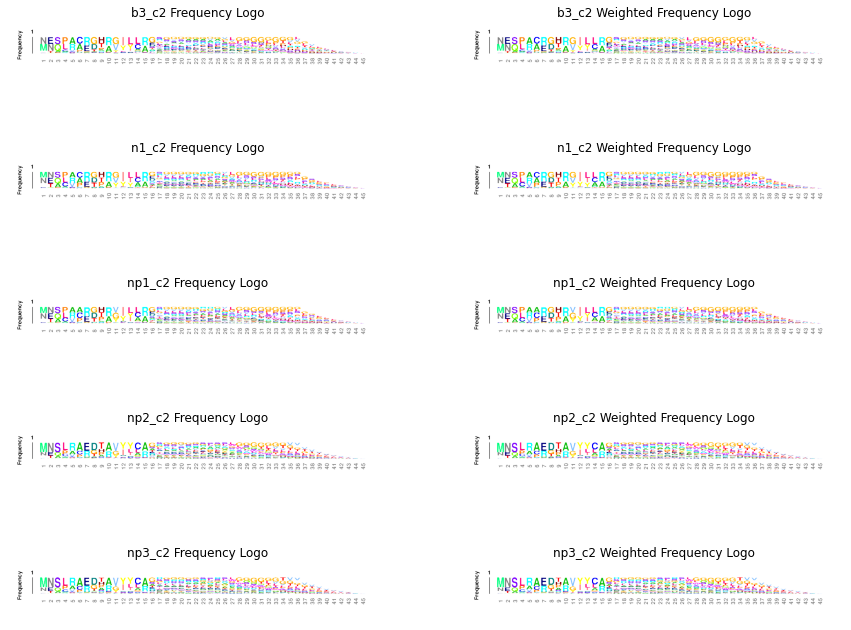

In [10]:
# Seq Logo showing Frequency of Each Amino Acid at each position
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(15, 12)

for rid, r in enumerate(c2_rounds):
    img1 = mpimg.imread(f".freq.png")
    img2 = mpimg.imread(f"{paths_w[rid]}.freq.png")
    axs[rid][0].imshow(img1)
    axs[rid][1].imshow(img2)
    axs[rid][0].axis("off")
    axs[rid][1].axis("off")
    axs[rid][0].set_title(f"{r} Frequency Logo")
    axs[rid][1].set_title(f"{r} Weighted Frequency Logo")

plt.show()

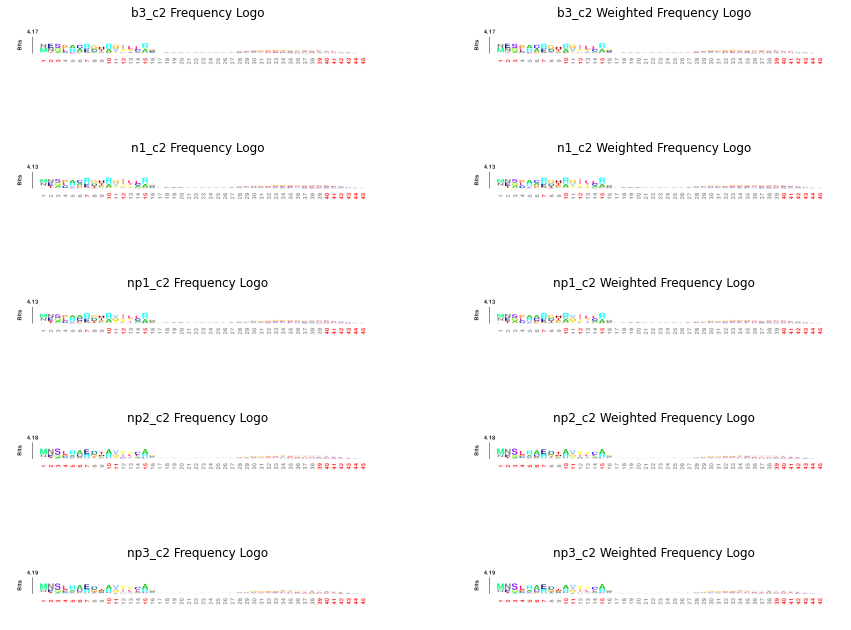

In [11]:
# Seq Logo showing Information of Each Amino Acid at each position
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(15, 12)

for rid, r in enumerate(c2_rounds):
    img1 = mpimg.imread(f"{paths_u[rid]}.info.png")
    img2 = mpimg.imread(f"{paths_u[rid]}.info.png")
    axs[rid][0].imshow(img1)
    axs[rid][1].imshow(img2)
    axs[rid][0].axis("off")
    axs[rid][1].axis("off")
    axs[rid][0].set_title(f"{r} Frequency Logo")
    axs[rid][1].set_title(f"{r} Weighted Frequency Logo")

plt.show()

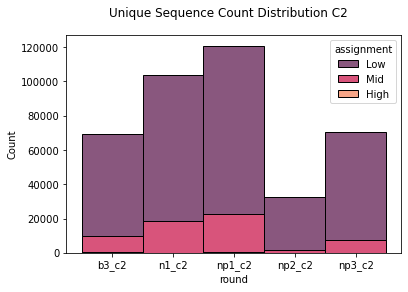

In [12]:
am.count_dist(data_c2, "Unique Sequence Count Distribution C2")

In [14]:
# Low count == 1, Med count < 10, High count >= 10
# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path("np3_c2", rbmdir=mdir)
np3_rbm = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
np3_likeli = am.generate_likelihoods(c2_rounds, np3_rbm, data_c2)

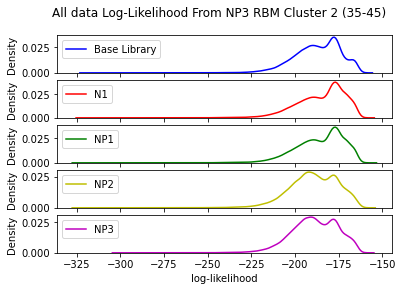

In [34]:
# Plot Likelihoods of Each batch of Data
np3_title = "All data Log-Likelihood From NP3 RBM Cluster 2 (35-45)"
np3_xaxis = "log-likelihood"
np3_order = ["b3_c2", "n1_c2", "np1_c2", "np2_c2", "np3_c2"]
np3_labels = ["Base Library", "N1", "NP1", "NP2", "NP3"]
np3_colors = ["b", "r", "g", "y", "m"]

# Should be Enough for most SELEX Experiments
supported_colors = ["b", "r", "g", "y", "m", "c", "w", "bl", "k", "c", "DarkKhaki", "DarkOrchid"]

am.plot_likelihoods(np3_likeli, np3_title, np3_xaxis, np3_order, np3_labels, np3_colors)

In [46]:
high_likeli_np3 = am.data_subset(data_c2, np3_likeli, "np3_c2", -176, 0)
first_peak_np3 = am.data_subset(data_c2, np3_likeli, "np3_c2", -183, -176)
second_peak_np3 = am.data_subset(data_c2, np3_likeli, "np3_c2", -225, -183)
# third_peak_np3 = data_subset(data_c2, np3_likeli, "np3_c2", -90, -80)
# tail_np3 = data_subset(data_c2, np3_likeli, "np3_c2", -130, -90)
# np3_subsets = [high_likeli_np3, first_peak_np3, second_peak_np3, third_peak_np3, tail_np3]

hp = am.seq_logo(high_likeli_np3, "high_likeli_np3_c2", weight=False, outdir="./generated/")
fp = am.seq_logo(first_peak_np3, "first_peak_likeli_np3_c2", weight=False, outdir="./generated/")
sp = am.seq_logo(second_peak_np3, "second_peak_likeli_np3_c2", weight=False, outdir="./generated/")

peaks = [hp, fp, sp]

Text(0.5, 0.98, 'NP3 Likelihood and Sequence Logos')

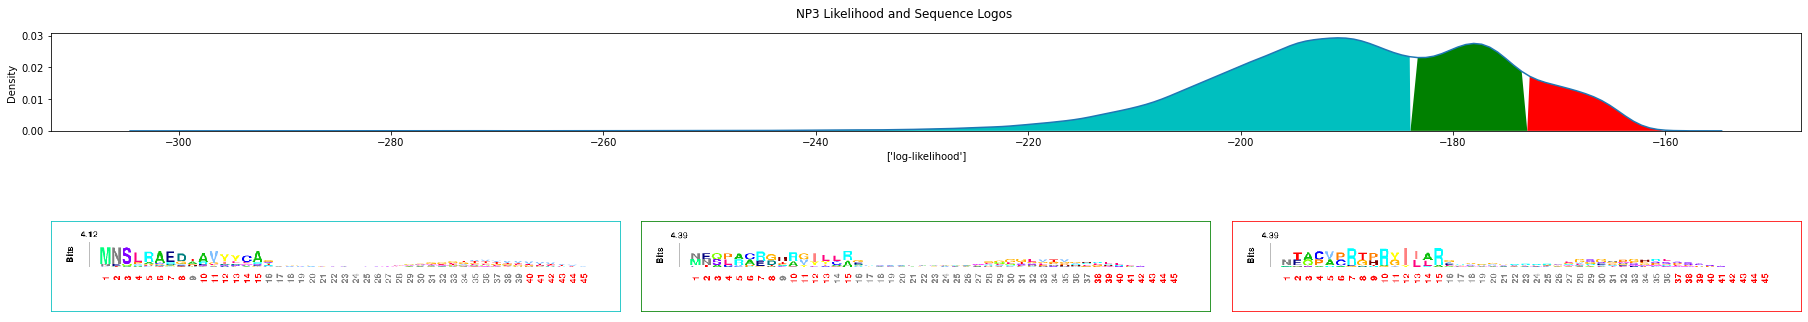

In [61]:
gs_kw = dict(width_ratios=[1, 1, 1], height_ratios=[0.5, 1])
fig, axd = plt.subplot_mosaic([['top', 'top', 'top'],
                               ['lower left', "middle", 'lower right']],
                              gridspec_kw=gs_kw, figsize=(25, 5),
                              constrained_layout=True)

sns.kdeplot(np3_likeli["np3_c2"], ax=axd["top"])
l = axd["top"].get_children()[0].get_path()
def shaded_kde_curve(ax, path, xmin, xmax, color):
    vertices = [ (x, y) for x, y in l.vertices if xmin < x < xmax]
    vertices.insert(0, (xmin, 0.))
    vertices.append((xmax, 0.))
    xfill, yfill = zip(*vertices)
    ax.fill(xfill, yfill, color)

shaded_kde_curve(axd["top"], l, -173, -160, "r")
shaded_kde_curve(axd["top"], l, -184, -173, "g")
shaded_kde_curve(axd["top"], l, -240, -184, "c")
axd["top"].set_xlabel("log-likelihood")

def color_subplot(ax, color):
    for spine in ax.spines.values():
        spine.set_edgecolor(color)

def seqlogo_subplot(ax, path, type="info"):
    img = mpimg.imread(f"{path}.{type}.png")
    ax.imshow(img, interpolation="nearest")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

color_subplot(axd["lower left"], "c")
color_subplot(axd["middle"], "g")
color_subplot(axd["lower right"], "r")

seqlogo_subplot(axd["lower left"], sp)
seqlogo_subplot(axd["middle"], fp)
seqlogo_subplot(axd["lower right"], hp)

fig.suptitle('NP3 Likelihood and Sequence Logos')

In [35]:
# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path("b3_c2")
b3_rbm = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
b3_likeli = am.generate_likelihoods(c2_rounds, b3_rbm, data_c2)

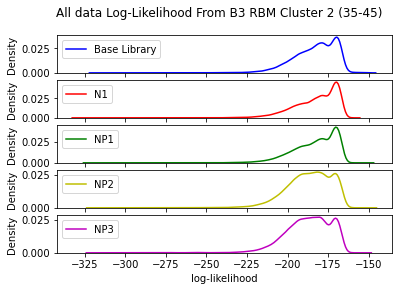

In [36]:
# assign likelihoods in new pd dataframe
b3_title = "All data Log-Likelihood From B3 RBM Cluster 2 (35-45)"
b3_xaxis = "log-likelihood"
b3_order = ["b3_c2", "n1_c2", "np1_c2", "np2_c2", "np3_c2"]
b3_labels = ["Base Library", "N1", "NP1", "NP2", "NP3"]
b3_colors = ["b", "r", "g", "y", "m"]

# Plot Likelihood Distributions
am.plot_likelihoods(b3_likeli, b3_title, b3_xaxis, b3_order, b3_labels, b3_colors)

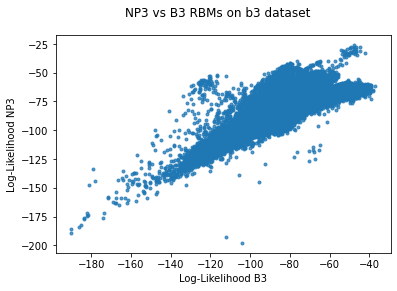

In [31]:
am.compare_likelihood_correlation(np3_likeli["b3_c2"], b3_likeli["b3_c2"], "NP3 vs B3 RBMs on b3 dataset", ["NP3", "B3"])

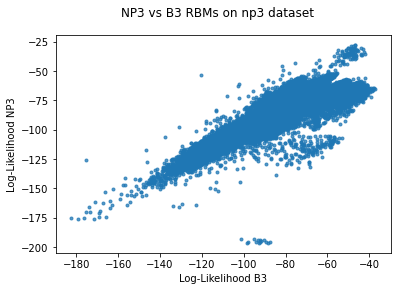

In [30]:
am.compare_likelihood_correlation(np3_likeli["np3_c2"], b3_likeli["np3_c2"], "NP3 vs B3 RBMs on np3 dataset", ["NP3", "B3"])

## Weighted RBMS

In [63]:
# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path("b3_c2_w", rbmdir=mdir)
b3_rbm_w = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
b3_likeli_w = am.generate_likelihoods(c2_rounds, b3_rbm_w, data_c2)

# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path("np3_c2_w", rbmdir=mdir)
np3_rbm_w = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
np3_likeli_w = am.generate_likelihoods(c2_rounds, np3_rbm_w, data_c2)

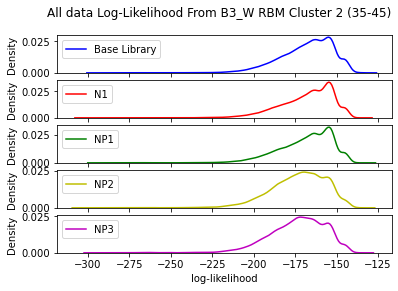

In [64]:
# assign likelihoods in new pd dataframe
b3_title = "All data Log-Likelihood From B3_W RBM Cluster 2 (35-45)"
b3_xaxis = "log-likelihood"
b3_order = ["b3_c2", "n1_c2", "np1_c2", "np2_c2", "np3_c2"]
b3_labels = ["Base Library", "N1", "NP1", "NP2", "NP3"]
b3_colors = ["b", "r", "g", "y", "m"]

# Plot Likelihood Distributions
am.plot_likelihoods(b3_likeli_w, b3_title, b3_xaxis, b3_order, b3_labels, b3_colors)

In [69]:
# Plot Likelihoods of Each batch of Data
np3_title = "All data Log-Likelihood From NP3 RBM Cluster 2 (35-45)"
np3_xaxis = "log-likelihood"
np3_order = ["b3_c2", "n1_c2", "np1_c2", "np2_c2", "np3_c2"]
np3_labels = ["Base Library", "N1", "NP1", "NP2", "NP3"]
np3_colors = ["b", "r", "g", "y", "m"]

# Should be Enough for most SELEX Experiments
supported_colors = ["b", "r", "g", "y", "m", "c", "w", "bl", "k", "c", "DarkKhaki", "DarkOrchid"]

am.plot_likelihoods(np3_likeli_w, np3_title, np3_xaxis, np3_order, np3_labels, np3_colors, clip=(-300, -100))

TypeError: plot_likelihoods() got an unexpected keyword argument 'clip'

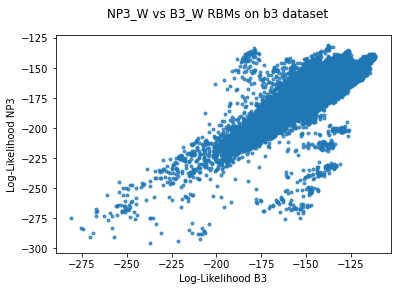

In [66]:
am.compare_likelihood_correlation(np3_likeli_w["b3_c2"], b3_likeli_w["b3_c2"], "NP3_W vs B3_W RBMs on b3 dataset", ["NP3", "B3"])

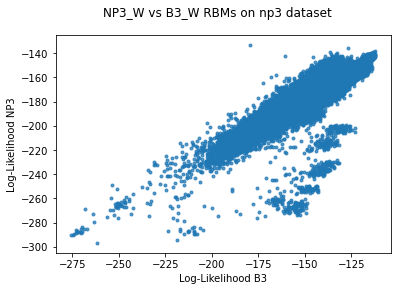

In [67]:
am.compare_likelihood_correlation(np3_likeli_w["np3_c2"], b3_likeli_w["np3_c2"], "NP3_W vs B3_W RBMs on np3 dataset", ["NP3", "B3"])